## **Multi-Class Classification**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf

## **Accessing the Dataset**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [5]:
(X_train, y_train) , (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [9]:
#  Train data consists of 60000 & test data consists of 10000 datapoints 
# Total 28 features, so the network will be of 28X28 pixels (i.e, 28 rows and 28 columns, so we have it as 3 dimensional - 60000,28,28 and 10000,28,28)

## **Visualisation of the data**

Text(0.5, 1.0, '9')

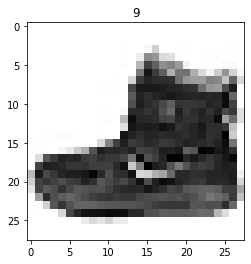

In [11]:
plt.imshow(X_train[0],'Greys')
plt.title(y_train[0])

In [13]:
# Creating a Dictionary of numbers and respective fashion items 

fashion_dict = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot'}

In [14]:
fashion_dict

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

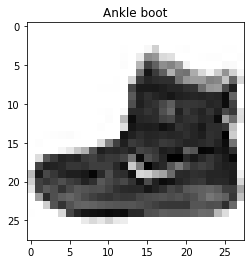

In [16]:
plt.imshow(X_train[0], 'Greys')
plt.title(fashion_dict[y_train[0]]);

# Now we are getting the title as Ankle Boot as the name 

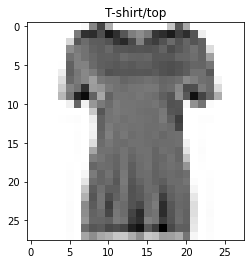

In [17]:
plt.imshow(X_train[10], 'Greys')
plt.title(fashion_dict[y_train[10]]);

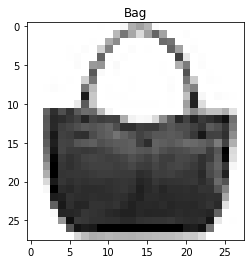

In [18]:
plt.imshow(X_train[100], 'Greys')
plt.title(fashion_dict[y_train[100]]);

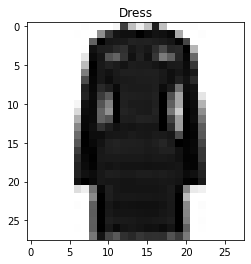

In [19]:
plt.imshow(X_train[500], 'Greys')
plt.title(fashion_dict[y_train[500]]);

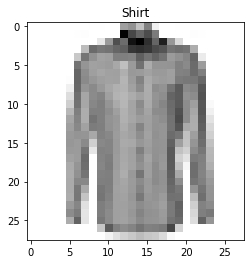

In [20]:
plt.imshow(X_train[3000], 'Greys')
plt.title(fashion_dict[y_train[3000]]);

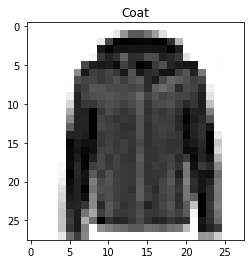

In [21]:
plt.imshow(X_train[5000], 'Greys')
plt.title(fashion_dict[y_train[5000]]);

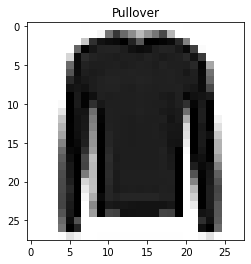

In [22]:
plt.imshow(X_train[15000], 'Greys')
plt.title(fashion_dict[y_train[15000]]);

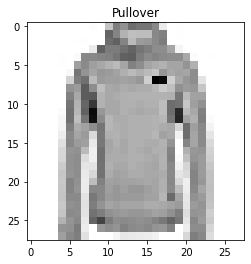

In [23]:
plt.imshow(X_train[45000], 'Greys')
plt.title(fashion_dict[y_train[45000]]);

## **Building a Model**

In [24]:
fashion_1 = tf.keras.Sequential()
fashion_1.add(tf.keras.layers.Flatten())
fashion_1.add(tf.keras.layers.Dense(300,activation='relu'))
fashion_1.add(tf.keras.layers.Dense(10,activation='softmax'))

# Input layer consists of 28X28 units = 784 units 
# We have 28X28 array (image size) total 784 pixels. We need to convert it into a single layer. So we convert this 28X28 into 1 X 784 (all 784 pixels in 1 layer) - We use 'Flatten' for that 
# Output layer has 10 units, as in the Fashion Dictionary there are 10 fashion items, so image has to be classified into 1 of these 10, hence output layer has 10 units 
# For Hidden Layer, we assume any value and proceed. Here we have considered randomly as 300 units in the Hidden Layer 
# We will use 'Softmax' activatino function for the Output layer 

## **Compiling the Model**

In [26]:
fashion_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

## **Training the Model**

Epoch 1/25
1875/1875 [==============================] - 9s 4ms/step - loss: 3.3806 - accuracy: 0.7374
Epoch 2/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5569 - accuracy: 0.8053
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5163 - accuracy: 0.8201
Epoch 4/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4908 - accuracy: 0.8261
Epoch 5/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4946 - accuracy: 0.8292
Epoch 6/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4694 - accuracy: 0.8349
Epoch 7/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4609 - accuracy: 0.8392
Epoch 8/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4647 - accuracy: 0.8369
Epoch 9/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4507 - accuracy: 0.8417
Epoch 10/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.441

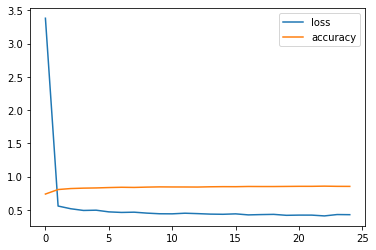

In [27]:
tf.random.set_seed(100)
history_1 = fashion_1.fit(X_train, y_train, epochs=25)
pd.DataFrame(history_1.history).plot()

## **Evaluation of the Model**

In [28]:
test_loss, test_accuracy = fashion_1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5468 - accuracy: 0.8229


In [30]:
print('The Test Loss:', test_loss)
print('The Test Accuracy:', test_accuracy)
print('\n The Train Loss:','0.4271')
print('The Train Accuracy:','0.8525')

The Test Loss: 0.5468084216117859
The Test Accuracy: 0.8228999972343445

 The Train Loss: 0.4271
The Train Accuracy: 0.8525


## **Improving the Model by adding one more Hidden Layer**

In [31]:
# Generally we first increase the number of Hidden Layers to see if there is any improvement, if not then we try to increase the number of units in the existing Hidden Layers 

In [32]:
fashion_2 = tf.keras.Sequential()
fashion_2.add(tf.keras.layers.Flatten())
fashion_2.add(tf.keras.layers.Dense(300,activation='relu'))
fashion_2.add(tf.keras.layers.Dense(100,activation='relu')) # Adding another Hidden Layer 
fashion_2.add(tf.keras.layers.Dense(10,activation='softmax'))

Epoch 1/25
1875/1875 [==============================] - 9s 4ms/step - loss: 2.2530 - accuracy: 0.7698
Epoch 2/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4925 - accuracy: 0.8300
Epoch 3/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4449 - accuracy: 0.8418
Epoch 4/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4187 - accuracy: 0.8517
Epoch 5/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3995 - accuracy: 0.8584
Epoch 6/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3867 - accuracy: 0.8638
Epoch 7/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3741 - accuracy: 0.8682
Epoch 8/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3659 - accuracy: 0.8710
Epoch 9/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3561 - accuracy: 0.8743
Epoch 10/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.342

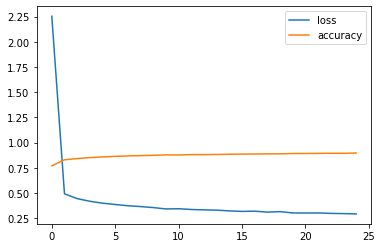

In [33]:
fashion_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

tf.random.set_seed(100)
history_2 = fashion_2.fit(X_train, y_train, epochs=25)
pd.DataFrame(history_2.history).plot()

In [35]:
test_loss,test_accuracy = fashion_2.evaluate(X_test, y_test)

print('\nThe Test Loss:', test_loss)
print('The Test Accuracy:', test_accuracy)
print('\n The Train Loss:','0.2932')
print('The Train Accuracy:','0.8971')

313/313 [==============================] - 1s 3ms/step - loss: 0.4506 - accuracy: 0.8618

The Test Loss: 0.4505595266819
The Test Accuracy: 0.8618000149726868

 The Train Loss: 0.2932
The Train Accuracy: 0.8971


In [36]:
# Focus is on Test Value - so from model 1 the loss has reduced in model 2, and accuracy has improved. So we can add more hidden layers and check 
# A point will come when the increase in hidden layers will not show any improvement or will decrease the accuracy and increase the loss, thats when you stop and try the next method 
# Next method is increasing the number of units in hidden layer 

## **Improving the Model by adding another Hidden Layer**

In [38]:
fashion_3 = tf.keras.Sequential()
fashion_3.add(tf.keras.layers.Flatten())
fashion_3.add(tf.keras.layers.Dense(300,activation='relu'))
fashion_3.add(tf.keras.layers.Dense(100,activation='relu')) 
fashion_3.add(tf.keras.layers.Dense(25,activation='relu'))  # Adding another Hidden Layer with 25 units 
fashion_3.add(tf.keras.layers.Dense(10,activation='softmax'))

Epoch 1/25
1875/1875 [==============================] - 8s 4ms/step - loss: 2.4589 - accuracy: 0.1195
Epoch 2/25
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3029 - accuracy: 0.0992
Epoch 3/25
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0985
Epoch 4/25
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3028 - accuracy: 0.1007
Epoch 5/25
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3028 - accuracy: 0.0976
Epoch 6/25
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0990
Epoch 7/25
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0996
Epoch 8/25
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3027 - accuracy: 0.0996
Epoch 9/25
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3028 - accuracy: 0.0964
Epoch 10/25
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3

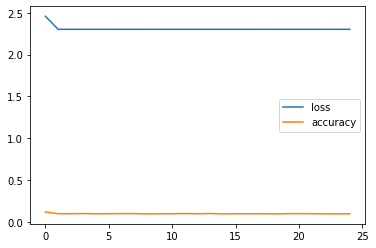

In [42]:
fashion_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

tf.random.set_seed(100)
history_3 = fashion_3.fit(X_train, y_train, epochs=25)
pd.DataFrame(history_3.history).plot()

#### **Note:**
#### **The Model fashion_3 is not good**
#### **Go ahead with model fashion_2**


## **Improving the Model by Changing the Number of units**

Epoch 1/25
1875/1875 [==============================] - 8s 4ms/step - loss: 2.2224 - accuracy: 0.7443
Epoch 2/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6171 - accuracy: 0.7987
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5472 - accuracy: 0.8134
Epoch 4/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4973 - accuracy: 0.8286
Epoch 5/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4562 - accuracy: 0.8406
Epoch 6/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4293 - accuracy: 0.8474
Epoch 7/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4119 - accuracy: 0.8539
Epoch 8/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4019 - accuracy: 0.8556
Epoch 9/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3856 - accuracy: 0.8611
Epoch 10/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.385

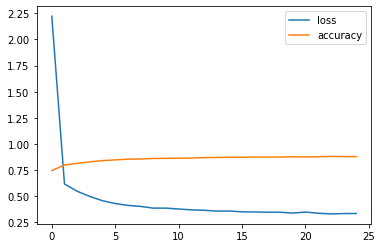

In [43]:
fashion_4 = tf.keras.Sequential()
fashion_4.add(tf.keras.layers.Flatten())
fashion_4.add(tf.keras.layers.Dense(200,activation='relu')) # Reduced the Number of units from 300 to 200 from model fashion_2, but named as fashion_4 for comparison
fashion_4.add(tf.keras.layers.Dense(100,activation='relu'))
fashion_4.add(tf.keras.layers.Dense(10,activation='softmax'))

fashion_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

tf.random.set_seed(100)
history_4 = fashion_4.fit(X_train, y_train, epochs=25)
pd.DataFrame(history_4.history).plot()

In [44]:
test_loss,test_accuracy = fashion_4.evaluate(X_test, y_test)

print('\nThe Test Loss:', test_loss)
print('The Test Accuracy:', test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.4424 - accuracy: 0.8579

The Test Loss: 0.4424266219139099
The Test Accuracy: 0.8579000234603882


#### **Note:**
#### **fashion_2 is the best model** 

## **Model Summary**

In [45]:
fashion_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               235500    
                                                                 
 dense_3 (Dense)             (None, 100)               30100     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## **Plotting the Model**

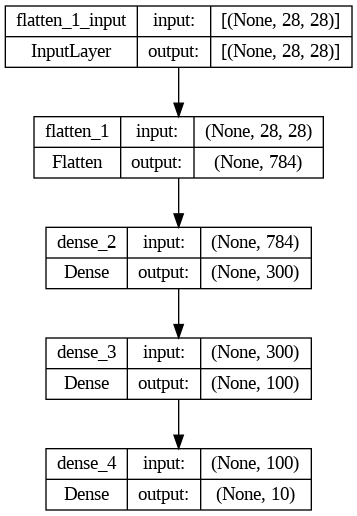

In [46]:
from tensorflow.keras.utils import plot_model 

plot_model(fashion_2,show_shapes=True)

## **Prediction using Model**

In [48]:
y_pred = fashion_2.predict(X_test)
y_pred

313/313 [==============================] - 1s 3ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.1259941e-03,
        1.1747452e-22, 9.9886978e-01],
       [7.5433873e-06, 7.4184631e-11, 9.9485266e-01, ..., 0.0000000e+00,
        7.4269368e-09, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.1626636e-10, 7.6033913e-16, 9.9855189e-15, ..., 0.0000000e+00,
        9.9999994e-01, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.6856268e-03, 6.1485356e-05, 4.7583124e-03, ..., 2.3114441e-01,
        3.8113631e-02, 4.4722252e-02]], dtype=float32)

In [49]:
y_pred[0]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 4.2623492e-06, 1.3596771e-34, 1.1259941e-03,
       1.1747452e-22, 9.9886978e-01], dtype=float32)

In [50]:
np.argmax(y_pred[0])

9

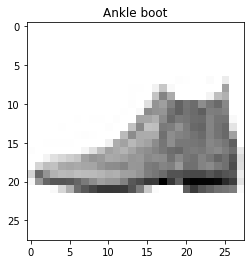

In [51]:
plt.imshow(X_test[0],'Greys')
plt.title(fashion_dict[np.argmax(y_pred[0])]);

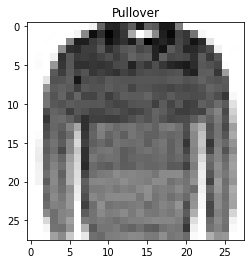

In [52]:
plt.imshow(X_test[20],'Greys')
plt.title(fashion_dict[np.argmax(y_pred[20])]);